In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import math
import tensorflow as tf

In [23]:
df = pd.read_csv("cruise_ship_info.csv")
df.head(10)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
5,Ecstasy,Carnival,22,70.367,20.52,8.55,10.20,34.29,9.20
6,Elation,Carnival,15,70.367,20.52,8.55,10.20,34.29,9.20
7,Fantasy,Carnival,23,70.367,20.56,8.55,10.22,34.23,9.20
8,Fascination,Carnival,19,70.367,20.52,8.55,10.20,34.29,9.20
9,Freedom,Carnival,6,110.239,37.00,9.51,14.87,29.79,11.50


In [24]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


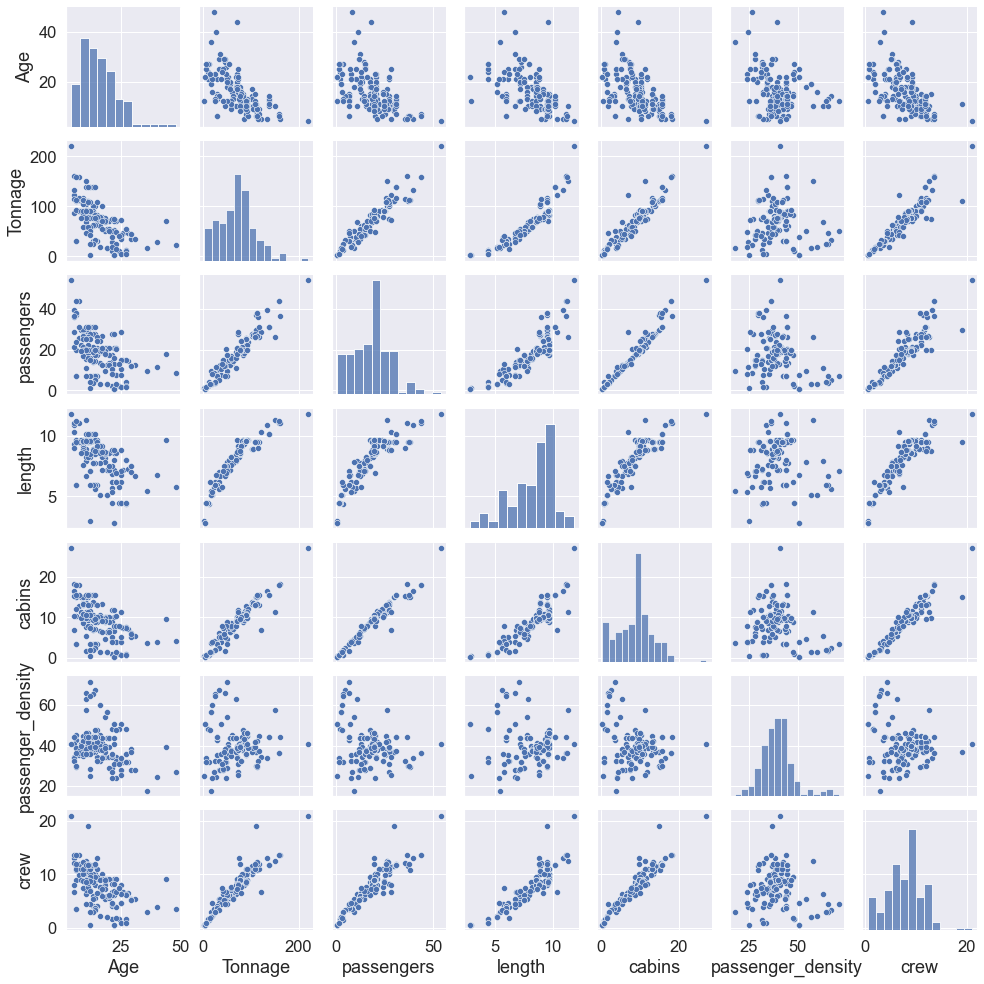

In [25]:
cols = ["Age","Tonnage","passengers","length","cabins","passenger_density","crew"]
sns.pairplot(df[cols],height=2)

c:\users\ahsun\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ahsun\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ahsun\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

<AxesSubplot:xlabel='crew', ylabel='Density'>

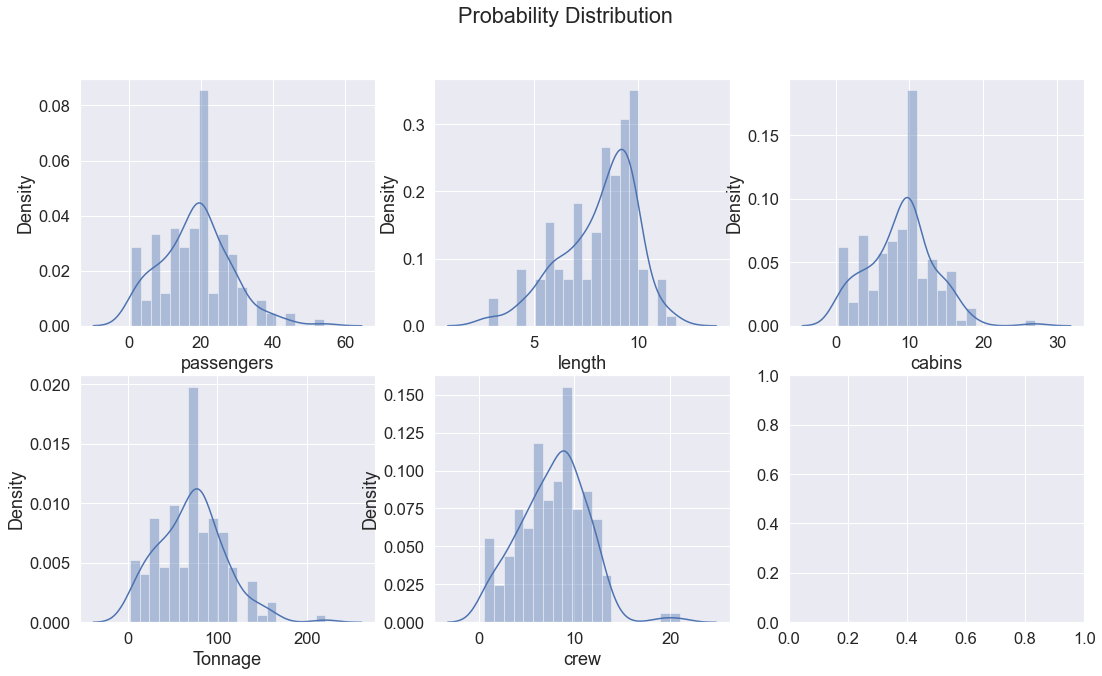

In [26]:
fig, axes = plt.subplots(2,3,figsize=(18,10))
fig.suptitle("Probability Distribution")

sns.distplot(df["passengers"],ax=axes[0,0],bins=20)
sns.distplot(df["length"],ax=axes[0,1],bins=20)
sns.distplot(df["cabins"],ax=axes[0,2],bins=20)
sns.distplot(df["Tonnage"],ax=axes[1,0],bins=20)
sns.distplot(df["crew"],ax=axes[1,1],bins=20)

In [27]:
autoscaler = StandardScaler()
features = df[cols]
df_scaled = pd.DataFrame(autoscaler.fit_transform(df[cols]))
df_scaled.head()

,0,1,2,3,4,5,6
0,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
1,-1.276402,-1.104984,-1.193956,-1.225331,-1.184588,0.318057,-1.215267
2,1.358105,-0.647310,-0.372926,-0.509363,-0.314095,-0.940676,-0.313304
3,-0.617775,1.043215,1.169614,0.782736,1.357341,-0.338017,3.237281
4,0.172577,0.810215,0.825445,0.441533,0.982670,-0.178934,0.631610


In [28]:
arr = df_scaled.to_numpy()
cov_mat = np.cov(arr.T)
print(cov_mat)

[[ 1.00636943 -0.61051007 -0.51882598 -0.53567624 -0.51326756 -0.28060619
  -0.53403648]
 [-0.61051007  1.00636943  0.9510809   0.92824328  0.95480665 -0.04110641
   0.93347689]
 [-0.51882598  0.9510809   1.00636943  0.8891624   0.9825601  -0.29674522
   0.92106365]
 [-0.53567624  0.92824328  0.8891624   1.00636943  0.89546571 -0.09106483
   0.90156272]
 [-0.51326756  0.95480665  0.9825601   0.89546571  1.00636943 -0.25479336
   0.9568788 ]
 [-0.28060619 -0.04110641 -0.29674522 -0.09106483 -0.25479336  1.00636943
  -0.15649979]
 [-0.53403648  0.93347689  0.92106365  0.90156272  0.9568788  -0.15649979
   1.00636943]]


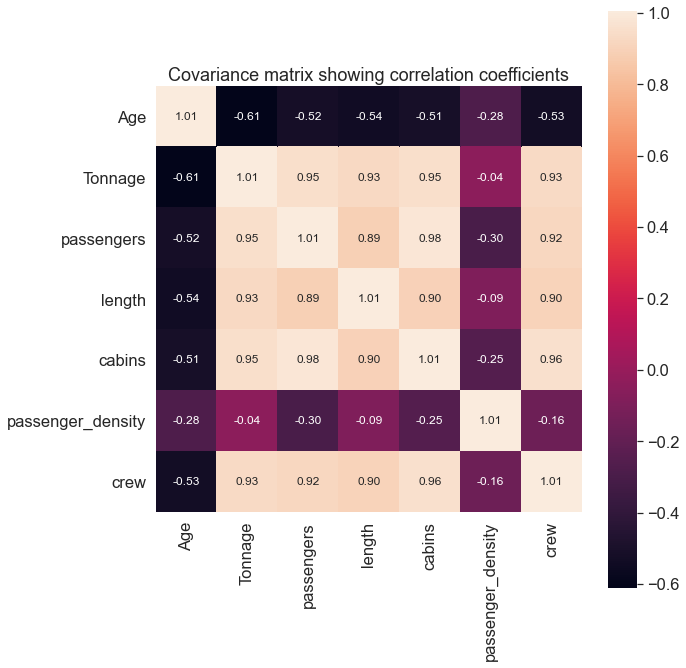

In [29]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [30]:
cols_selected = ["Tonnage","passengers","length","cabins","crew"]
data = df[cols_selected].to_numpy()
print(data[0])
np.random.shuffle(data)
print(data[0:2])
train = 0.8
train_data = data[0:int(math.ceil(train*len(data)))]
test_data = data[int(math.ceil(train*len(data))):]
print(data.shape)
print(train_data.shape)
print(test_data.shape)
train_x = train_data[:,0:4]
train_y = train_data[:,4]
print(train_x.shape)
print(train_y.shape)
test_x = test_data[:,0:4]
test_y = test_data[:,4]
print(test_x.shape)
print(test_y.shape)

[30.277  6.94   5.94   3.55   3.55 ]
[[74.137 19.5    9.16   9.75   7.6  ]
 [70.    18.     8.67   9.     7.2  ]]
(158, 5)
(127, 5)
(31, 5)
(127, 4)
(127,)
(31, 4)
(31,)


In [98]:
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,input_shape=(train_x.shape[1],)),
    tf.keras.layers.Dense(16,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(2,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=Adam(lr=0.001),loss="mean_squared_error",metrics=["mean_squared_error"])
model.summary()


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 32)                160       
_________________________________________________________________
dense_153 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_154 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_155 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_156 (Dense)            (None, 2)                 10        
_________________________________________________________________
dense_157 (Dense)            (None, 1)                 3         
Total params: 873
Trainable params: 873
Non-trainable params: 0
_______________________________________________________

In [99]:
history = model.fit(train_x,train_y,epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 665us/step - loss: 91.1224 - mean_squared_error: 91.1224
Epoch 2/1000
4/4 [==============================] - 0s 333us/step - loss: 83.6067 - mean_squared_error: 83.6067
Epoch 3/1000
4/4 [==============================] - 0s 332us/step - loss: 79.5168 - mean_squared_error: 79.5168
Epoch 4/1000
4/4 [==============================] - 0s 333us/step - loss: 84.6676 - mean_squared_error: 84.6676
Epoch 5/1000
4/4 [==============================] - 0s 665us/step - loss: 83.5108 - mean_squared_error: 83.5108
Epoch 6/1000
4/4 [==============================] - 0s 665us/step - loss: 77.7349 - mean_squared_error: 77.7349
Epoch 7/1000
4/4 [==============================] - 0s 665us/step - loss: 75.5083 - mean_squared_error: 75.5083
Epoch 8/1000
4/4 [==============================] - 0s 665us/step - loss: 77.4123 - mean_squared_error: 77.4123
Epoch 9/1000
4/4 [==============================] - 0s 665us/step - loss: 71.8416 - mean_squared_error: 

4/4 [==============================] - 0s 665us/step - loss: 69.3265 - mean_squared_error: 69.3265
Epoch 74/1000
4/4 [==============================] - 0s 665us/step - loss: 73.1374 - mean_squared_error: 73.1374
Epoch 75/1000
4/4 [==============================] - 0s 332us/step - loss: 69.4908 - mean_squared_error: 69.4908
Epoch 76/1000
4/4 [==============================] - 0s 665us/step - loss: 76.3254 - mean_squared_error: 76.3254
Epoch 77/1000
4/4 [==============================] - 0s 333us/step - loss: 68.8632 - mean_squared_error: 68.8632
Epoch 78/1000
4/4 [==============================] - 0s 665us/step - loss: 68.9288 - mean_squared_error: 68.9288
Epoch 79/1000
4/4 [==============================] - 0s 665us/step - loss: 74.3531 - mean_squared_error: 74.3531
Epoch 80/1000
4/4 [==============================] - 0s 332us/step - loss: 73.2955 - mean_squared_error: 73.2955
Epoch 81/1000
4/4 [==============================] - 0s 665us/step - loss: 70.8123 - mean_squared_error: 70.81

4/4 [==============================] - 0s 665us/step - loss: 71.3853 - mean_squared_error: 71.3853
Epoch 146/1000
4/4 [==============================] - 0s 332us/step - loss: 68.0227 - mean_squared_error: 68.0227
Epoch 147/1000
4/4 [==============================] - 0s 332us/step - loss: 69.8187 - mean_squared_error: 69.8187
Epoch 148/1000
4/4 [==============================] - 0s 332us/step - loss: 75.8567 - mean_squared_error: 75.8567
Epoch 149/1000
4/4 [==============================] - 0s 333us/step - loss: 68.7893 - mean_squared_error: 68.7893
Epoch 150/1000
4/4 [==============================] - 0s 665us/step - loss: 72.8627 - mean_squared_error: 72.8627
Epoch 151/1000
4/4 [==============================] - 0s 665us/step - loss: 71.7106 - mean_squared_error: 71.7106
Epoch 152/1000
4/4 [==============================] - 0s 665us/step - loss: 73.2816 - mean_squared_error: 73.2816
Epoch 153/1000
4/4 [==============================] - 0s 665us/step - loss: 74.7729 - mean_squared_erro

Epoch 217/1000
4/4 [==============================] - 0s 665us/step - loss: 71.4015 - mean_squared_error: 71.4015
Epoch 218/1000
4/4 [==============================] - 0s 665us/step - loss: 69.4869 - mean_squared_error: 69.4869
Epoch 219/1000
4/4 [==============================] - 0s 333us/step - loss: 69.8274 - mean_squared_error: 69.8274
Epoch 220/1000
4/4 [==============================] - 0s 332us/step - loss: 70.8623 - mean_squared_error: 70.8623
Epoch 221/1000
4/4 [==============================] - 0s 332us/step - loss: 67.8063 - mean_squared_error: 67.8063
Epoch 222/1000
4/4 [==============================] - 0s 332us/step - loss: 68.2993 - mean_squared_error: 68.2993
Epoch 223/1000
4/4 [==============================] - 0s 665us/step - loss: 70.6616 - mean_squared_error: 70.6616
Epoch 224/1000
4/4 [==============================] - 0s 665us/step - loss: 66.3027 - mean_squared_error: 66.3027
Epoch 225/1000
4/4 [==============================] - 0s 333us/step - loss: 68.6113 - me

4/4 [==============================] - 0s 665us/step - loss: 67.5341 - mean_squared_error: 67.5341
Epoch 289/1000
4/4 [==============================] - 0s 665us/step - loss: 68.2645 - mean_squared_error: 68.2645
Epoch 290/1000
4/4 [==============================] - 0s 665us/step - loss: 67.9192 - mean_squared_error: 67.9192
Epoch 291/1000
4/4 [==============================] - 0s 665us/step - loss: 71.8883 - mean_squared_error: 71.8883
Epoch 292/1000
4/4 [==============================] - 0s 332us/step - loss: 70.7319 - mean_squared_error: 70.7319
Epoch 293/1000
4/4 [==============================] - 0s 332us/step - loss: 66.0884 - mean_squared_error: 66.0884
Epoch 294/1000
4/4 [==============================] - 0s 332us/step - loss: 72.5540 - mean_squared_error: 72.5540
Epoch 295/1000
4/4 [==============================] - 0s 665us/step - loss: 72.5478 - mean_squared_error: 72.5478
Epoch 296/1000
4/4 [==============================] - 0s 665us/step - loss: 73.4843 - mean_squared_erro

Epoch 360/1000
4/4 [==============================] - 0s 332us/step - loss: 68.2667 - mean_squared_error: 68.2667
Epoch 361/1000
4/4 [==============================] - 0s 665us/step - loss: 68.5824 - mean_squared_error: 68.5824
Epoch 362/1000
4/4 [==============================] - 0s 665us/step - loss: 68.8229 - mean_squared_error: 68.8229
Epoch 363/1000
4/4 [==============================] - 0s 665us/step - loss: 75.6081 - mean_squared_error: 75.6081
Epoch 364/1000
4/4 [==============================] - 0s 665us/step - loss: 69.8402 - mean_squared_error: 69.8402
Epoch 365/1000
4/4 [==============================] - 0s 665us/step - loss: 69.1756 - mean_squared_error: 69.1756
Epoch 366/1000
4/4 [==============================] - 0s 665us/step - loss: 71.6202 - mean_squared_error: 71.6202
Epoch 367/1000
4/4 [==============================] - 0s 333us/step - loss: 68.7585 - mean_squared_error: 68.7585
Epoch 368/1000
4/4 [==============================] - 0s 332us/step - loss: 73.2212 - me

4/4 [==============================] - 0s 333us/step - loss: 69.9945 - mean_squared_error: 69.9945
Epoch 432/1000
4/4 [==============================] - 0s 332us/step - loss: 65.6416 - mean_squared_error: 65.6416
Epoch 433/1000
4/4 [==============================] - 0s 332us/step - loss: 63.9532 - mean_squared_error: 63.9532
Epoch 434/1000
4/4 [==============================] - 0s 332us/step - loss: 66.2918 - mean_squared_error: 66.2918
Epoch 435/1000
4/4 [==============================] - 0s 333us/step - loss: 69.9409 - mean_squared_error: 69.9409
Epoch 436/1000
4/4 [==============================] - 0s 665us/step - loss: 70.0226 - mean_squared_error: 70.0226
Epoch 437/1000
4/4 [==============================] - 0s 665us/step - loss: 66.4720 - mean_squared_error: 66.4720
Epoch 438/1000
4/4 [==============================] - 0s 665us/step - loss: 70.8596 - mean_squared_error: 70.8596
Epoch 439/1000
4/4 [==============================] - 0s 665us/step - loss: 63.8681 - mean_squared_erro

Epoch 503/1000
4/4 [==============================] - 0s 665us/step - loss: 69.8374 - mean_squared_error: 69.8374
Epoch 504/1000
4/4 [==============================] - 0s 332us/step - loss: 64.6373 - mean_squared_error: 64.6373
Epoch 505/1000
4/4 [==============================] - 0s 332us/step - loss: 69.1845 - mean_squared_error: 69.1845
Epoch 506/1000
4/4 [==============================] - 0s 665us/step - loss: 73.3895 - mean_squared_error: 73.3895
Epoch 507/1000
4/4 [==============================] - 0s 665us/step - loss: 69.0876 - mean_squared_error: 69.0876
Epoch 508/1000
4/4 [==============================] - 0s 664us/step - loss: 70.6372 - mean_squared_error: 70.6372
Epoch 509/1000
4/4 [==============================] - 0s 332us/step - loss: 66.9694 - mean_squared_error: 66.9694
Epoch 510/1000
4/4 [==============================] - 0s 333us/step - loss: 70.5706 - mean_squared_error: 70.5706
Epoch 511/1000
4/4 [==============================] - 0s 333us/step - loss: 66.8539 - me

4/4 [==============================] - 0s 333us/step - loss: 72.6975 - mean_squared_error: 72.6975
Epoch 575/1000
4/4 [==============================] - 0s 332us/step - loss: 63.6654 - mean_squared_error: 63.6654
Epoch 576/1000
4/4 [==============================] - 0s 665us/step - loss: 63.5476 - mean_squared_error: 63.5476
Epoch 577/1000
4/4 [==============================] - 0s 665us/step - loss: 70.3429 - mean_squared_error: 70.3429
Epoch 578/1000
4/4 [==============================] - 0s 665us/step - loss: 63.6269 - mean_squared_error: 63.6269
Epoch 579/1000
4/4 [==============================] - 0s 665us/step - loss: 65.5285 - mean_squared_error: 65.5284
Epoch 580/1000
4/4 [==============================] - 0s 332us/step - loss: 65.3896 - mean_squared_error: 65.3896
Epoch 581/1000
4/4 [==============================] - 0s 333us/step - loss: 70.3253 - mean_squared_error: 70.3253
Epoch 582/1000
4/4 [==============================] - 0s 665us/step - loss: 66.9625 - mean_squared_erro

Epoch 646/1000
4/4 [==============================] - 0s 665us/step - loss: 69.5316 - mean_squared_error: 69.5316
Epoch 647/1000
4/4 [==============================] - 0s 665us/step - loss: 66.0238 - mean_squared_error: 66.0238
Epoch 648/1000
4/4 [==============================] - 0s 665us/step - loss: 70.6944 - mean_squared_error: 70.6944
Epoch 649/1000
4/4 [==============================] - 0s 333us/step - loss: 67.6013 - mean_squared_error: 67.6013
Epoch 650/1000
4/4 [==============================] - 0s 332us/step - loss: 70.1135 - mean_squared_error: 70.1135
Epoch 651/1000
4/4 [==============================] - 0s 665us/step - loss: 69.4256 - mean_squared_error: 69.4256
Epoch 652/1000
4/4 [==============================] - 0s 665us/step - loss: 71.8511 - mean_squared_error: 71.8511
Epoch 653/1000
4/4 [==============================] - 0s 665us/step - loss: 66.0638 - mean_squared_error: 66.0638
Epoch 654/1000
4/4 [==============================] - 0s 665us/step - loss: 71.1220 - me

4/4 [==============================] - 0s 332us/step - loss: 69.8508 - mean_squared_error: 69.8508
Epoch 718/1000
4/4 [==============================] - 0s 332us/step - loss: 76.6473 - mean_squared_error: 76.6473
Epoch 719/1000
4/4 [==============================] - 0s 665us/step - loss: 64.0702 - mean_squared_error: 64.0702
Epoch 720/1000
4/4 [==============================] - 0s 665us/step - loss: 67.7111 - mean_squared_error: 67.7111
Epoch 721/1000
4/4 [==============================] - 0s 332us/step - loss: 64.4809 - mean_squared_error: 64.4809
Epoch 722/1000
4/4 [==============================] - 0s 332us/step - loss: 62.9975 - mean_squared_error: 62.9975
Epoch 723/1000
4/4 [==============================] - 0s 332us/step - loss: 65.3922 - mean_squared_error: 65.3922
Epoch 724/1000
4/4 [==============================] - 0s 665us/step - loss: 66.8045 - mean_squared_error: 66.8045
Epoch 725/1000
4/4 [==============================] - 0s 665us/step - loss: 67.2586 - mean_squared_erro

Epoch 789/1000
4/4 [==============================] - 0s 665us/step - loss: 65.1729 - mean_squared_error: 65.1729
Epoch 790/1000
4/4 [==============================] - 0s 665us/step - loss: 62.4096 - mean_squared_error: 62.4096
Epoch 791/1000
4/4 [==============================] - 0s 332us/step - loss: 63.9819 - mean_squared_error: 63.9819
Epoch 792/1000
4/4 [==============================] - 0s 332us/step - loss: 70.5146 - mean_squared_error: 70.5146
Epoch 793/1000
4/4 [==============================] - 0s 332us/step - loss: 64.3550 - mean_squared_error: 64.3550
Epoch 794/1000
4/4 [==============================] - 0s 332us/step - loss: 65.5801 - mean_squared_error: 65.5801
Epoch 795/1000
4/4 [==============================] - 0s 332us/step - loss: 70.8291 - mean_squared_error: 70.8291
Epoch 796/1000
4/4 [==============================] - 0s 665us/step - loss: 64.8081 - mean_squared_error: 64.8081
Epoch 797/1000
4/4 [==============================] - 0s 665us/step - loss: 66.7721 - me

4/4 [==============================] - 0s 333us/step - loss: 66.7857 - mean_squared_error: 66.7857
Epoch 861/1000
4/4 [==============================] - 0s 332us/step - loss: 66.2434 - mean_squared_error: 66.2434
Epoch 862/1000
4/4 [==============================] - 0s 333us/step - loss: 70.2513 - mean_squared_error: 70.2513
Epoch 863/1000
4/4 [==============================] - 0s 332us/step - loss: 68.4110 - mean_squared_error: 68.4110
Epoch 864/1000
4/4 [==============================] - 0s 665us/step - loss: 69.9578 - mean_squared_error: 69.9578
Epoch 865/1000
4/4 [==============================] - 0s 665us/step - loss: 64.4596 - mean_squared_error: 64.4596
Epoch 866/1000
4/4 [==============================] - 0s 665us/step - loss: 68.5066 - mean_squared_error: 68.5066
Epoch 867/1000
4/4 [==============================] - 0s 665us/step - loss: 68.5886 - mean_squared_error: 68.5886
Epoch 868/1000
4/4 [==============================] - 0s 665us/step - loss: 63.5423 - mean_squared_erro

Epoch 932/1000
4/4 [==============================] - 0s 332us/step - loss: 66.3372 - mean_squared_error: 66.3372
Epoch 933/1000
4/4 [==============================] - 0s 665us/step - loss: 66.3433 - mean_squared_error: 66.3433
Epoch 934/1000
4/4 [==============================] - 0s 665us/step - loss: 62.6823 - mean_squared_error: 62.6823
Epoch 935/1000
4/4 [==============================] - 0s 332us/step - loss: 64.9465 - mean_squared_error: 64.9465
Epoch 936/1000
4/4 [==============================] - 0s 332us/step - loss: 69.6592 - mean_squared_error: 69.6592
Epoch 937/1000
4/4 [==============================] - 0s 333us/step - loss: 69.1782 - mean_squared_error: 69.1782
Epoch 938/1000
4/4 [==============================] - 0s 332us/step - loss: 63.9650 - mean_squared_error: 63.9650
Epoch 939/1000
4/4 [==============================] - 0s 665us/step - loss: 67.9611 - mean_squared_error: 67.9611
Epoch 940/1000
4/4 [==============================] - 0s 665us/step - loss: 59.4853 - me

<Figure size 432x288 with 0 Axes>

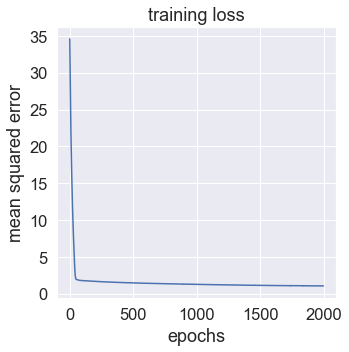

<Figure size 432x288 with 0 Axes>

In [92]:
train_loss = history.history["loss"]
epochs = range(0,len(train_loss))
plt.figure(figsize=(5,5))
plt.plot(epochs,train_loss)
plt.title("training loss")
plt.xlabel("epochs")
plt.ylabel("mean squared error")
plt.figure()

[ 8.631752   7.0607085 12.106111  11.188404   9.128537 ]
[ 9.2   6.36 11.6  10.68  9.  ]


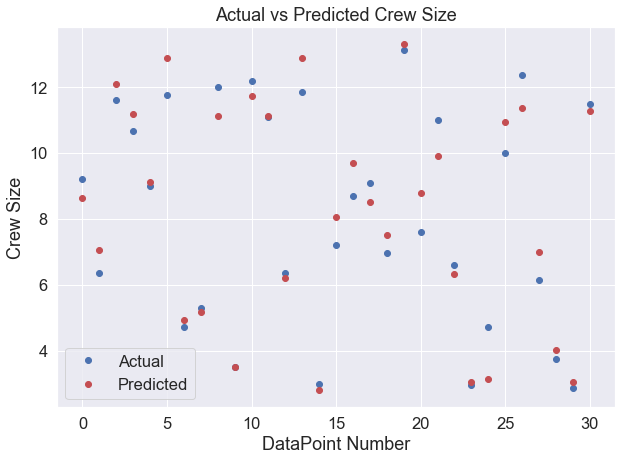

In [93]:
predictions = model.predict(test_x)
predictions = predictions.flatten()
print(predictions[0:5])
original = test_y.T
print(original[0:5])

x = range(0,len(original))
plt.figure(figsize=(10,7))
actual = plt.plot(x,original,"bo",label="Actual")
predicted = plt.plot(x,predictions,"ro",label="Predicted")
plt.title("Actual vs Predicted Crew Size")
plt.ylabel("Crew Size")
plt.xlabel("DataPoint Number")
plt.grid(True)
plt.legend(loc="best")
plt.show()


    